# Hospital Analysis

this is project is to predict whetjer an hopsital in the US will be open depending the location, ownership and many other factors

# Importing neccesary librairies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pathway = "Documents/programming/data/covid19-analysis/"

In [3]:
reg_hosp= pd.read_csv(pathway+"reg_hosp.csv")

wrangling the data

In [4]:
reg_hosp.shape

(6920, 34)

In [5]:
reg_hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6920 entries, 0 to 6919
Data columns (total 34 columns):
Unnamed: 0    6920 non-null int64
geometry      6920 non-null object
objectid      6920 non-null int64
id            6920 non-null int64
name          6920 non-null object
address       6920 non-null object
city          6920 non-null object
state         6920 non-null object
zip           6920 non-null int64
zip4          6920 non-null object
telephone     6920 non-null object
type          6920 non-null object
status        6920 non-null object
population    6920 non-null int64
county        6920 non-null object
countyfips    6920 non-null object
country       6920 non-null object
latitude      6920 non-null float64
longitude     6920 non-null float64
naics_code    6920 non-null int64
naics_desc    6920 non-null object
source        6920 non-null object
sourcedate    6920 non-null object
val_method    6920 non-null object
val_date      6920 non-null object
website       6920 non

In [6]:
reg_hosp.describe(include="all")

,Unnamed: 0,geometry,objectid,id,name,address,city,state,zip,zip4,...,val_date,website,state_id,alt_name,st_fips,owner,ttl_staff,beds,trauma,helipad
count,6920.000000,6920,6920.000000,6.920000e+03,6920,6920,6920,6920,6920.000000,6920,...,6920,6920,6920,6920,6920.000000,6920,6920.0,6920.000000,6920,6920
unique,NaN,6920,NaN,NaN,6666,6816,3228,55,NaN,81,...,58,6181,3389,842,NaN,8,NaN,NaN,59,4
top,NaN,POINT (-122.405762115 37.756575615),NaN,NaN,MEMORIAL HOSPITAL,100 HOSPITAL DRIVE,HOUSTON,TX,NaN,NOT AVAILABLE,...,2017-12-18T00:00:00.000Z,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NaN,NON-PROFIT,NaN,NaN,NOT AVAILABLE,NOT AVAILABLE
freq,NaN,1,NaN,NaN,11,8,67,771,NaN,6837,...,836,214,3146,6049,NaN,3418,NaN,NaN,4984,3378
mean,3780.389451,NaN,11312.341618,2.227770e+07,NaN,NaN,NaN,NaN,53704.278757,NaN,...,NaN,NaN,NaN,NaN,29.416618,NaN,-999.0,146.629480,NaN,NaN
std,2195.855720,NaN,2201.687785,3.382131e+07,NaN,NaN,NaN,NaN,27178.000334,NaN,...,NaN,NaN,NaN,NaN,16.124560,NaN,0.0,176.454148,NaN,NaN
min,0.000000,NaN,7497.000000,2.600000e+01,NaN,NaN,NaN,NaN,605.000000,NaN,...,NaN,NaN,NaN,NaN,1.000000,NaN,-999.0,2.000000,NaN,NaN
25%,1925.750000,NaN,9404.750000,3.982601e+06,NaN,NaN,NaN,NaN,32308.000000,NaN,...,NaN,NaN,NaN,NaN,17.000000,NaN,-999.0,30.000000,NaN,NaN
50%,3794.500000,NaN,11311.500000,9.431937e+06,NaN,NaN,NaN,NaN,54722.000000,NaN,...,NaN,NaN,NaN,NaN,29.000000,NaN,-999.0,79.000000,NaN,NaN
75%,5673.250000,NaN,13221.250000,2.041752e+07,NaN,NaN,NaN,NaN,76589.000000,NaN,...,NaN,NaN,NaN,NaN,45.000000,NaN,-999.0,196.000000,NaN,NaN


In [7]:
reg_hosp.iloc[:5,15:]

,countyfips,country,latitude,longitude,naics_code,naics_desc,source,sourcedate,val_method,val_date,website,state_id,alt_name,st_fips,owner,ttl_staff,beds,trauma,helipad
0,25025,USA,42.378509,-71.049056,622310,"REHABILITATION HOSPITALS (EXCEPT ALCOHOLISM, D...",http://www.mass.gov/eohhs/gov/departments/dph/...,2018-02-16T00:00:00.000Z,IMAGERY,2018-03-19T00:00:00.000Z,http://spauldingrehab.org/,2321,NOT AVAILABLE,25,NON-PROFIT,-999,132,NOT AVAILABLE,NOT AVAILABLE
1,25001,USA,41.732984,-70.468103,622310,"REHABILITATION HOSPITALS (EXCEPT ALCOHOLISM, D...",http://www.mass.gov/eohhs/gov/departments/dph/...,2018-02-16T00:00:00.000Z,IMAGERY WITH OTHER,2018-03-19T00:00:00.000Z,http://spauldingrehab.org/locations/sandwich-ma/,2FXY,NOT AVAILABLE,25,NON-PROFIT,-999,60,NOT AVAILABLE,False
2,25021,USA,42.189000,-71.202100,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.mass.gov/eohhs/gov/departments/dph/...,2018-02-16T00:00:00.000Z,IMAGERY WITH OTHER,2018-03-19T00:00:00.000Z,https://www.norwood-hospital.org/,2114,NORWOOD HOSPITAL,25,PROPRIETARY,-999,215,NOT AVAILABLE,True
3,25023,USA,42.087900,-70.991500,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.mass.gov/eohhs/gov/departments/dph/...,2018-02-16T00:00:00.000Z,IMAGERY WITH OTHER,2018-03-19T00:00:00.000Z,http://www.signature-healthcare.org,2118,BROCKTON HOSPITAL,25,NON-PROFIT,-999,197,NOT AVAILABLE,NOT AVAILABLE
4,25005,USA,41.912672,-71.102206,622210,"HOSPITALS, PSYCHIATRIC (EXCEPT CONVALESCENT)",http://www.mass.gov/eohhs/gov/departments/dph/...,2018-02-16T00:00:00.000Z,IMAGERY WITH OTHER,2018-03-19T00:00:00.000Z,http://www.mass.gov/eohhs/gov/departments/dmh/,2815,NOT AVAILABLE,25,GOVERNMENT - STATE,-999,45,NOT AVAILABLE,NOT AVAILABLE


In [8]:
reg_hosp[["type","naics_desc","val_method"]]

,type,naics_desc,val_method
0,REHABILITATION,"REHABILITATION HOSPITALS (EXCEPT ALCOHOLISM, D...",IMAGERY
1,REHABILITATION,"REHABILITATION HOSPITALS (EXCEPT ALCOHOLISM, D...",IMAGERY WITH OTHER
2,GENERAL ACUTE CARE,GENERAL MEDICAL AND SURGICAL HOSPITALS,IMAGERY WITH OTHER
3,GENERAL ACUTE CARE,GENERAL MEDICAL AND SURGICAL HOSPITALS,IMAGERY WITH OTHER
4,PSYCHIATRIC,"HOSPITALS, PSYCHIATRIC (EXCEPT CONVALESCENT)",IMAGERY WITH OTHER
...,...,...,...
6915,GENERAL ACUTE CARE,GENERAL MEDICAL AND SURGICAL HOSPITALS,IMAGERY WITH OTHER
6916,GENERAL ACUTE CARE,GENERAL MEDICAL AND SURGICAL HOSPITALS,GEOCODE
6917,CRITICAL ACCESS,GENERAL MEDICAL AND SURGICAL HOSPITALS,IMAGERY WITH OTHER
6918,GENERAL ACUTE CARE,GENERAL MEDICAL AND SURGICAL HOSPITALS,IMAGERY WITH OTHER


In [9]:
reg_hosp.columns

Index(['Unnamed: 0', 'geometry', 'objectid', 'id', 'name', 'address', 'city',
       'state', 'zip', 'zip4', 'telephone', 'type', 'status', 'population',
       'county', 'countyfips', 'country', 'latitude', 'longitude',
       'naics_code', 'naics_desc', 'source', 'sourcedate', 'val_method',
       'val_date', 'website', 'state_id', 'alt_name', 'st_fips', 'owner',
       'ttl_staff', 'beds', 'trauma', 'helipad'],
      dtype='object')

In [10]:
reg_hosp1=reg_hosp.drop(columns=['Unnamed: 0', 'geometry', 'objectid', 'id', 'name', 'address','state_id', 'zip', 'zip4', 'telephone','countyfips', 'country', 'latitude', 'longitude','naics_desc', 'source', 'sourcedate', 'val_date', 'website', 'alt_name', 'st_fips',"naics_desc","val_method",'ttl_staff'])
reg_hosp1

,city,state,type,status,population,county,naics_code,owner,beds,trauma,helipad
0,BOSTON,MA,REHABILITATION,OPEN,132,SUFFOLK,622310,NON-PROFIT,132,NOT AVAILABLE,NOT AVAILABLE
1,SANDWICH,MA,REHABILITATION,OPEN,60,BARNSTABLE,622310,NON-PROFIT,60,NOT AVAILABLE,False
2,NORWOOD,MA,GENERAL ACUTE CARE,OPEN,215,NORFOLK,622110,PROPRIETARY,215,NOT AVAILABLE,True
3,BROCKTON,MA,GENERAL ACUTE CARE,OPEN,197,PLYMOUTH,622110,NON-PROFIT,197,NOT AVAILABLE,NOT AVAILABLE
4,TAUNTON,MA,PSYCHIATRIC,OPEN,30,BRISTOL,622210,GOVERNMENT - STATE,45,NOT AVAILABLE,NOT AVAILABLE
...,...,...,...,...,...,...,...,...,...,...,...
6915,PAHRUMP,NV,GENERAL ACUTE CARE,OPEN,25,NYE,622110,PROPRIETARY,25,NOT AVAILABLE,NOT AVAILABLE
6916,SUSQUEHANNA,PA,GENERAL ACUTE CARE,OPEN,58,SUSQUEHANNA,622110,NON-PROFIT,58,NOT AVAILABLE,False
6917,HAWTHORNE,NV,CRITICAL ACCESS,OPEN,11,MINERAL,622110,NON-PROFIT,11,NOT AVAILABLE,NOT AVAILABLE
6918,TONOPAH,NV,GENERAL ACUTE CARE,OPEN,44,NYE,622110,PROPRIETARY,44,NOT AVAILABLE,NOT AVAILABLE


In [11]:
reg_hosp['status'].value_counts()

OPEN      6641
CLOSED     279
Name: status, dtype: int64

In [12]:
reg_hosp1["status"]=reg_hosp1['status'].replace({"OPEN":1,
                           "CLOSED":0})

In [13]:
cols= set(reg_hosp.columns) - set(['Unnamed: 0',"type", 'geometry', 'objectid', 'id', 'name', 'address','state_id', 'zip', 'zip4', 'telephone','countyfips', 'country', 'latitude', 'longitude','naics_desc', 'source', 'sourcedate', 'val_date', 'website', 'alt_name', 'st_fips',"naics_desc","val_method",'ttl_staff'])
cols

{'beds',
 'city',
 'county',
 'helipad',
 'naics_code',
 'owner',
 'population',
 'state',
 'status',
 'trauma'}

In [14]:
reg_hosp[cols].iloc[:10,:]

,beds,population,helipad,status,city,owner,state,county,trauma,naics_code
0,132,132,NOT AVAILABLE,OPEN,BOSTON,NON-PROFIT,MA,SUFFOLK,NOT AVAILABLE,622310
1,60,60,False,OPEN,SANDWICH,NON-PROFIT,MA,BARNSTABLE,NOT AVAILABLE,622310
2,215,215,True,OPEN,NORWOOD,PROPRIETARY,MA,NORFOLK,NOT AVAILABLE,622110
3,197,197,NOT AVAILABLE,OPEN,BROCKTON,NON-PROFIT,MA,PLYMOUTH,NOT AVAILABLE,622110
4,45,30,NOT AVAILABLE,OPEN,TAUNTON,GOVERNMENT - STATE,MA,BRISTOL,NOT AVAILABLE,622210
5,675,675,NOT AVAILABLE,OPEN,TEWKSBURY,GOVERNMENT - STATE,MA,MIDDLESEX,NOT AVAILABLE,622310
6,303,303,NOT AVAILABLE,OPEN,WORCESTER,NON-PROFIT,MA,WORCESTER,"LEVEL I, PEDIATRIC II",622110
7,47,47,NOT AVAILABLE,OPEN,LEICESTER,PROPRIETARY,MA,WORCESTER,NOT AVAILABLE,622310
8,127,127,NOT AVAILABLE,OPEN,SPRINGFIELD,PROPRIETARY,MA,HAMPDEN,NOT AVAILABLE,622310
9,120,120,NOT AVAILABLE,OPEN,PEMBROKE,PROPRIETARY,MA,PLYMOUTH,NOT AVAILABLE,622210


In [242]:
hosp_train,hosp_test,type_train,type_test=train_test_split(reg_hosp[cols],reg_hosp["type"], test_size= 0.3, random_state=17 )

In [241]:
reg_hosp["type"]= reg_hosp["type"].replace(Type1)

In [15]:
traum= set(reg_hosp["trauma"])

In [16]:
#reg_hosp['trauma'].replace(traum)
trau={}
u=0
for I in traum:
    trau[I]= u
    u+=1
trau

{'REGIONAL TRAUMA CENTER': 0,
 'LEVEL II, PEDIATRIC II': 1,
 'RTH': 2,
 'LEVEL I PEDIATRIC': 3,
 'CTH': 4,
 'LEVEL II': 5,
 'IV': 6,
 'NOT DESIGNATED': 7,
 'I': 8,
 'I,PEDIATRIC I': 9,
 'II': 10,
 'NOT AVAILABLE': 11,
 'LEVEL I ADULT & PEDIATRIC': 12,
 'PEDIATRICS I': 13,
 '1': 14,
 'LEVEL III': 15,
 'PEDIATRIC 1': 16,
 'LEVEL III/PEDIATRIC': 17,
 'I, I PEDIATRIC': 18,
 'PEDIATRIC LEVEL I': 19,
 'TRH': 20,
 'LEVEL 1': 21,
 'ATH': 22,
 'LEVEL II PEDIATRIC': 23,
 'TRAUMA SYSTEM HOSPITAL': 24,
 'LEVEL I, I PEDIATRIC': 25,
 'PEDIATRIC': 26,
 'NON-DESIGNATED': 27,
 'I , II PEDIATIRCS': 28,
 'LEVEL II, PEDIACTRICS II': 29,
 'LEVEL I, PEDIACTRIC II': 30,
 'PROVISIONAL LEVEL II': 31,
 'III': 32,
 'LEVEL III PEDIATRIC': 33,
 'PEDIATRIC LEVEL II': 34,
 'RTC': 35,
 'LEVEL I, PEDIATRICS I': 36,
 'II, II PEDIATRIC': 37,
 'UNCLASSIFIED': 38,
 'LEVEL V': 39,
 'TRF': 40,
 'LEVEL III/PEDIATIC': 41,
 'AREA': 42,
 'PROVISIONAL LEVEL III': 43,
 'LEVEL I, PEDIATRIC I': 44,
 'LEVEL II / PEDIATRIC': 45,
 'LE

In [17]:
reg_hosp1["trauma"]=reg_hosp1["trauma"].replace(trau)

In [18]:
reg_hosp1.head()

,city,state,type,status,population,county,naics_code,owner,beds,trauma,helipad
0,BOSTON,MA,REHABILITATION,1,132,SUFFOLK,622310,NON-PROFIT,132,11,NOT AVAILABLE
1,SANDWICH,MA,REHABILITATION,1,60,BARNSTABLE,622310,NON-PROFIT,60,11,False
2,NORWOOD,MA,GENERAL ACUTE CARE,1,215,NORFOLK,622110,PROPRIETARY,215,11,True
3,BROCKTON,MA,GENERAL ACUTE CARE,1,197,PLYMOUTH,622110,NON-PROFIT,197,11,NOT AVAILABLE
4,TAUNTON,MA,PSYCHIATRIC,1,30,BRISTOL,622210,GOVERNMENT - STATE,45,11,NOT AVAILABLE


In [19]:
county= set(reg_hosp["county"])


In [20]:
cunty={}
u=1
for x in county:
    cunty[x]=u
    u+=1


In [21]:
reg_hosp1['county']= reg_hosp1["county"].replace(cunty)

In [22]:
city= set(reg_hosp["city"])

In [23]:
city1={}
u=1
for x in city:
    city1[x]=u
    u+=1
reg_hosp1['city']= reg_hosp1['city'].replace(city1)

In [24]:
state= set(reg_hosp["state"])
Type= set(reg_hosp["type"])


In [25]:
state1={}
u=0
for x in state:
    state1[x]=u
    u+=1
    
Type1={}
e=0
for x in Type:
    Type1[x]=e
    e+=1


In [26]:
reg_hosp1["state"],reg_hosp1["type"]= reg_hosp1["state"].replace(state1),reg_hosp1["type"].replace(Type1)

In [27]:
reg_hosp1_dict=["trauma",trau,"city",city1,"state",state1,"type",Type1,"county",cunty]

In [204]:
reg_hosp1_dict

['trauma',
 {'II, II PEDIATRIC': 0,
  'NOT AVAILABLE': 1,
  'REGIONAL TRAUMA CENTER': 2,
  'LEVEL II, PEDIACTRICS II': 3,
  'LEVEL I, I PEDIATRIC': 4,
  'LEVEL III/PEDIATRIC': 5,
  'RTH': 6,
  'LEVEL II, PEDIATRIC II': 7,
  'I, II PEDIATRIC': 8,
  'II PEDIATRIC': 9,
  'LEVEL I, PEDIACTRIC II': 10,
  'LEVEL II PEDIATRIC': 11,
  'LEVEL II': 12,
  'RTC': 13,
  'LEVEL I, PEDIATRIC': 14,
  'CTH': 15,
  'I , II PEDIATIRCS': 16,
  'TRAUMA SYSTEM HOSPITAL': 17,
  '3': 18,
  'LEVEL I': 19,
  'LEVEL I PEDIATRIC': 20,
  'AREA': 21,
  'LEVEL I, PEDIATRIC II': 22,
  'RPTC': 23,
  'LEVEL I, PEDIATRIC I': 24,
  'I': 25,
  'PROVISIONAL LEVEL III': 26,
  'PEDIATRIC 1': 27,
  '1': 28,
  'PEDIATRICS I': 29,
  'LEVEL 1': 30,
  'PARC': 31,
  'PEDIATRIC LEVEL II': 32,
  'I,PEDIATRIC I': 33,
  'LEVEL II / PEDIATRIC': 34,
  'TRH': 35,
  'LEVEL V': 36,
  'II': 37,
  'TRF': 38,
  'PEDIATRIC I': 39,
  'I, I PEDIATRIC': 40,
  'UNCLASSIFIED': 41,
  'LEVEL IV': 42,
  'NON-DESIGNATED': 43,
  'PROVISIONAL LEVEL II': 

In [28]:
owner=set(reg_hosp['owner'])
helipad= set(reg_hosp['helipad'])

In [29]:
owner1={}
helipad1={}
u=1
b=1
for x in owner:
    owner1[x]=u
    u+=1

for y in helipad:
    helipad1[y]=b
    b+=1

In [30]:
reg_hosp1['helipad'],reg_hosp1["owner"]= reg_hosp1['helipad'].replace(helipad1),reg_hosp1["owner"].replace(owner1)

In [198]:
helipad1

{'NOT AVAILABLE': 1, 'H': 2, 'False': 3, 'True': 4}

In [31]:
reg_hosp1.head(10)

,city,state,type,status,population,county,naics_code,owner,beds,trauma,helipad
0,2141,7,2,1,132,458,622310,3,132,11,3
1,1161,7,2,1,60,17,622310,3,60,11,1
2,1366,7,7,1,215,346,622110,6,215,11,2
3,2118,7,7,1,197,1230,622110,3,197,11,3
4,1624,7,9,1,30,962,622210,5,45,11,3
5,716,7,5,1,675,1466,622310,5,675,11,3
6,1150,7,7,1,303,572,622110,3,303,47,3
7,1938,7,4,1,47,572,622310,6,47,11,3
8,1025,7,4,1,127,1565,622310,6,127,11,3
9,588,7,9,1,120,1230,622210,6,120,11,3


In [32]:
reg_hosp1.to_csv(pathway+'regulated_hosp.csv')

In [34]:
y= reg_hosp1['status']

In [35]:
reg_hosp1.drop("status", axis=1)

,city,state,type,population,county,naics_code,owner,beds,trauma,helipad
0,2141,7,2,132,458,622310,3,132,11,3
1,1161,7,2,60,17,622310,3,60,11,1
2,1366,7,7,215,346,622110,6,215,11,2
3,2118,7,7,197,1230,622110,3,197,11,3
4,1624,7,9,30,962,622210,5,45,11,3
...,...,...,...,...,...,...,...,...,...,...
6915,897,14,7,25,281,622110,6,25,11,3
6916,2084,21,7,58,999,622110,3,58,11,1
6917,2048,14,6,11,290,622110,3,11,11,3
6918,1995,14,7,44,281,622110,6,44,11,3


# visualizing the data

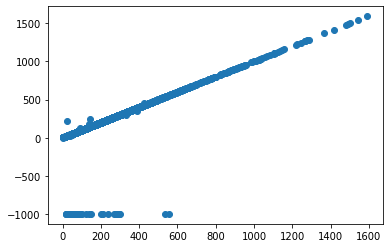

In [85]:
plt.scatter(reg_hosp1['beds'], reg_hosp1["population"])
plt.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold,GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [86]:
from sklearn.datasets import load_files

In [90]:
data=load_files

In [94]:
from io import BytesIO

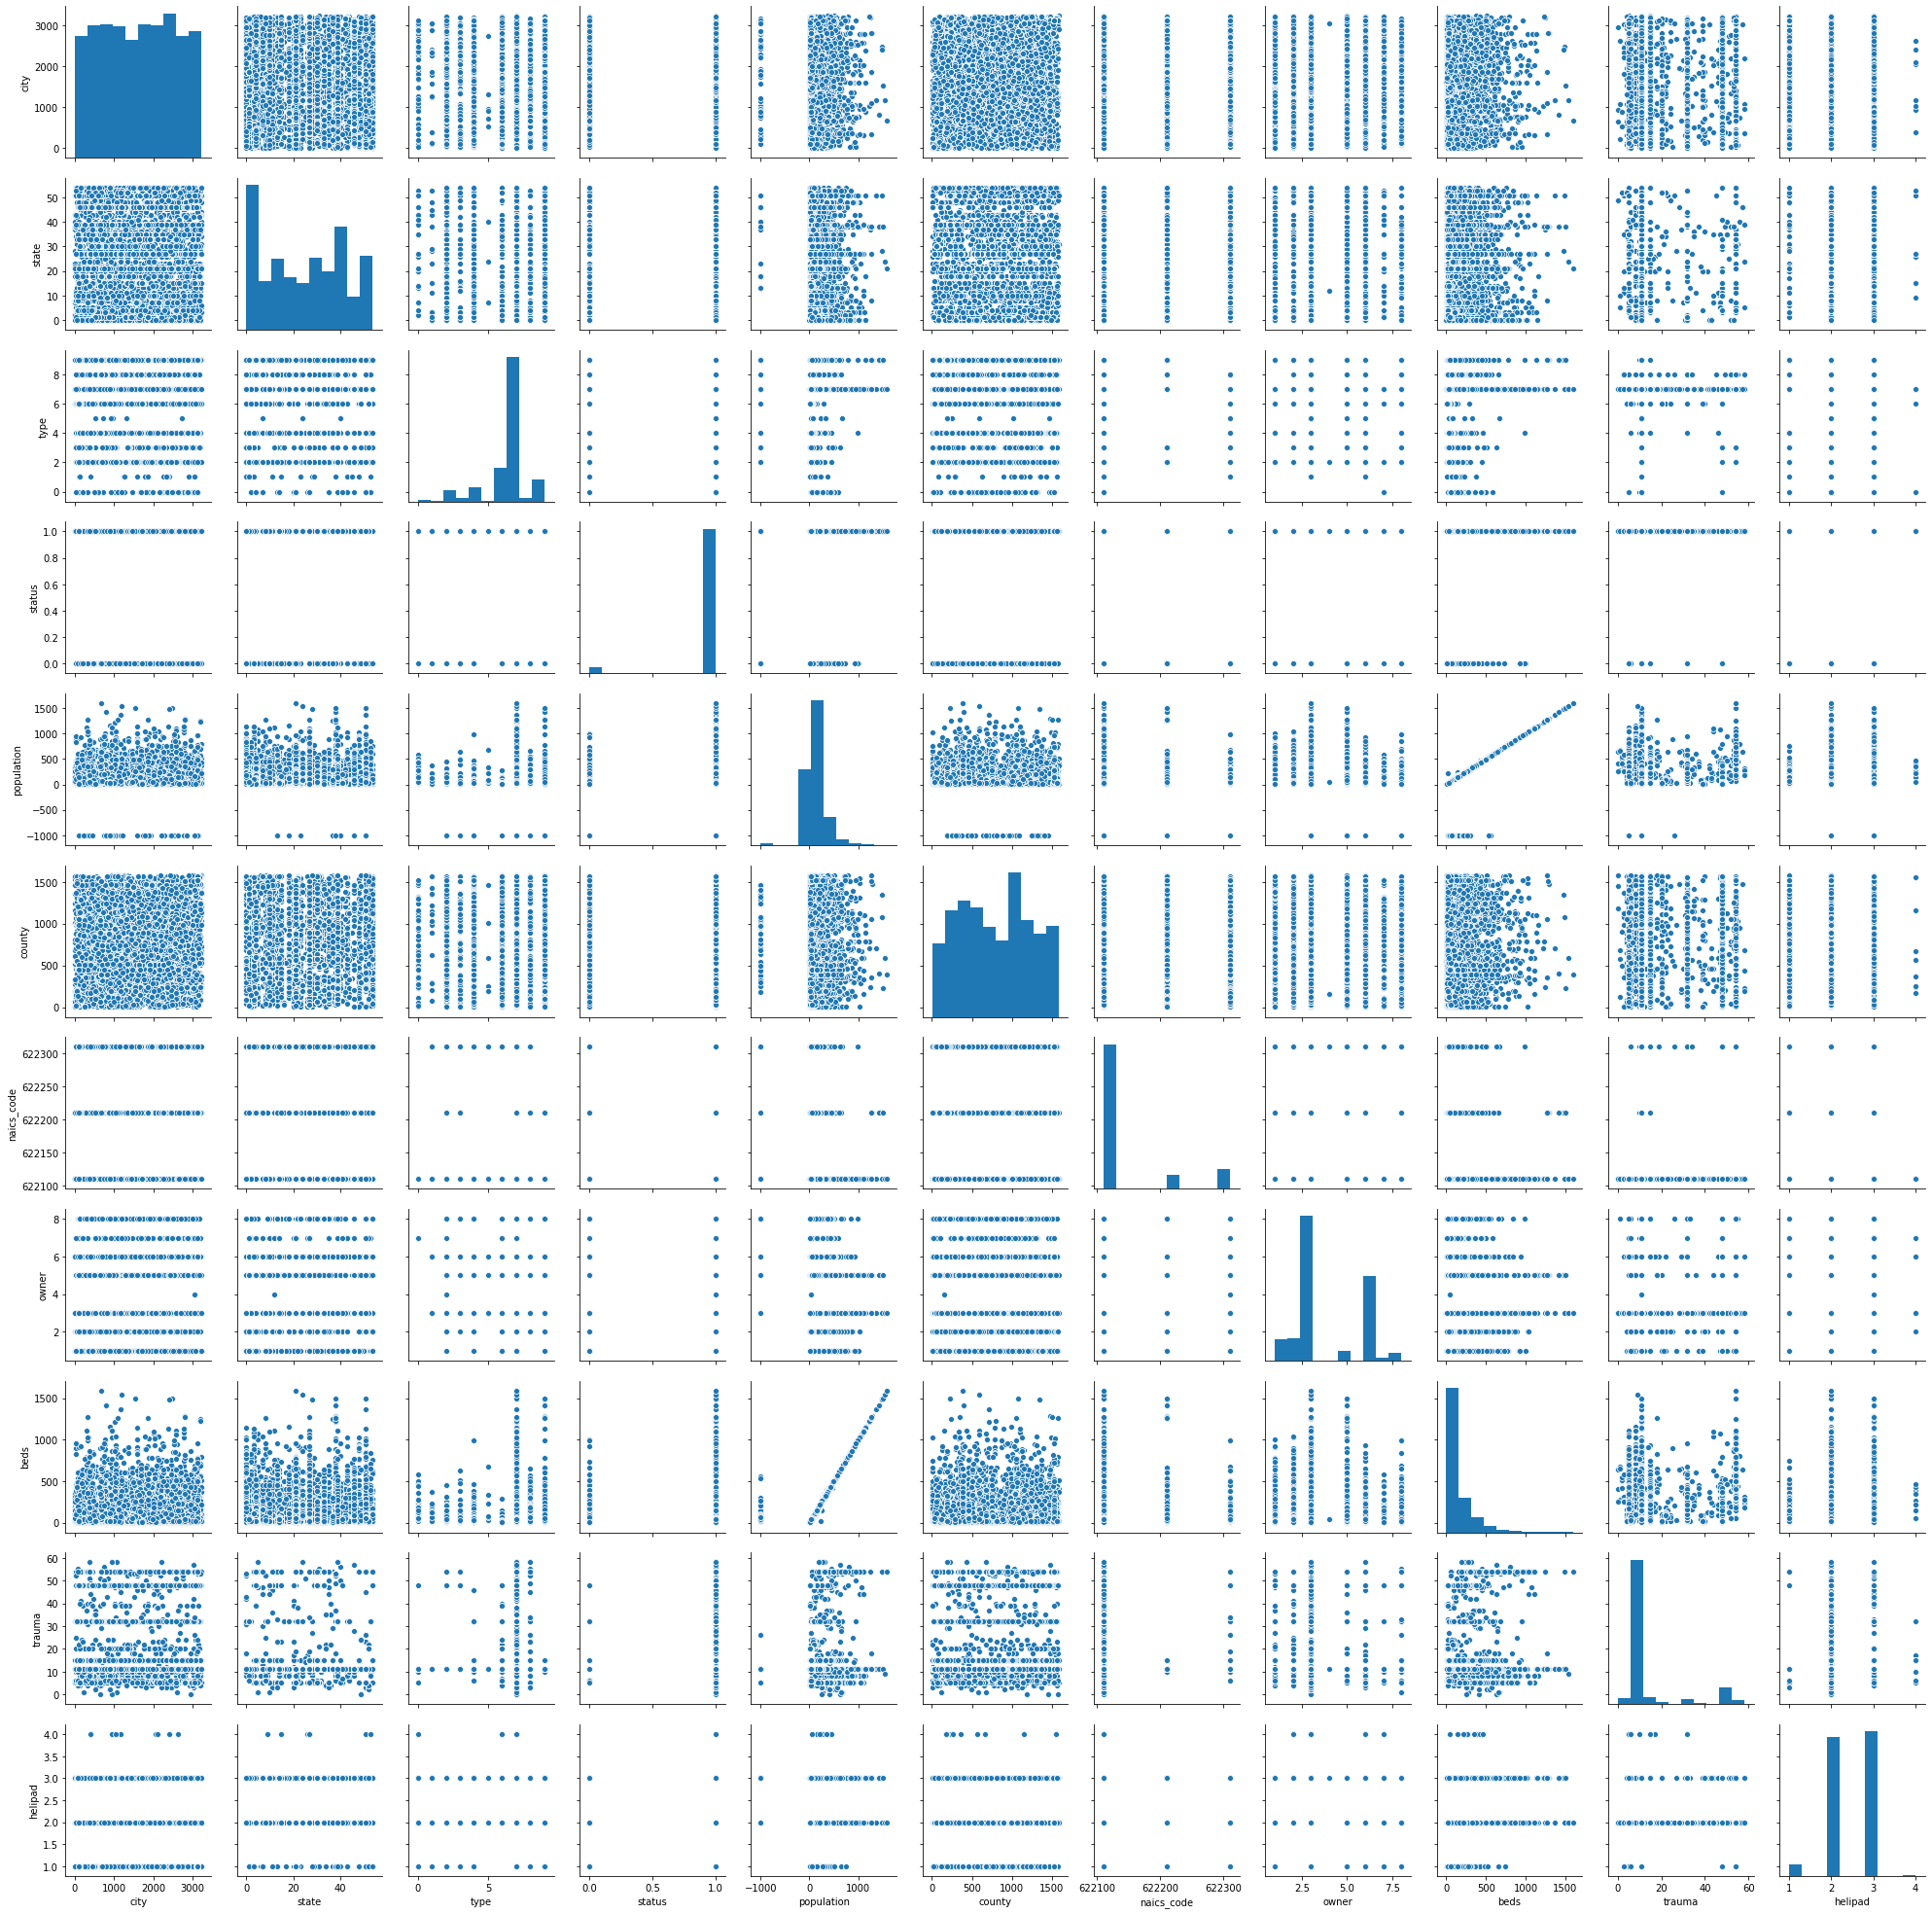

In [45]:
sns.pairplot(reg_hosp1)

In [47]:
poly= PolynomialFeatures()
X_poly= poly.fit_transform(reg_hosp1)

In [109]:
reg_hosp1.head()

,city,state,type,status,population,county,naics_code,owner,beds,trauma,helipad
0,2141,7,2,1,132,458,622310,3,132,11,3
1,1161,7,2,1,60,17,622310,3,60,11,1
2,1366,7,7,1,215,346,622110,6,215,11,2
3,2118,7,7,1,197,1230,622110,3,197,11,3
4,1624,7,9,1,30,962,622210,5,45,11,3


In [111]:
y.unique()

array([1, 0], dtype=int64)

# Applying machine learning models

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [169]:
x= reg_hosp1.drop("beds", axis=1).values

In [170]:
x

array([[2141,    7,    2, ...,    3,   11,    3],
       [1161,    7,    2, ...,    3,   11,    1],
       [1366,    7,    7, ...,    6,   11,    2],
       ...,
       [2048,   14,    6, ...,    3,   11,    3],
       [1995,   14,    7, ...,    6,   11,    3],
       [2805,   14,    7, ...,    2,   11,    3]], dtype=int64)

In [192]:
y= reg_hosp1["beds"].values

In [193]:
y

array([132,  60, 215, ...,  11,  44,  38], dtype=int64)

In [124]:
logic= LogisticRegression()

In [125]:
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=17)

In [126]:
logic.fit(x_train,y_train)

C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
y_new= logic.predict(x_test)

In [131]:
print(accuracy_score(y_test,y_new))

0.10741811175337188


In [265]:
def linear_fit(x,y):
    p= x.shape[1]
    z=[x[:,c]* y for c in range(p)]
    o=np.mean(z)
    q=np.mean(x)*np.mean(y)
    num= q-o
    den= (np.mean(x, axis=0)**2 - np.mean(x**2, axis=0))
    m = num/den
    e= np.mean(y)-(m*np.mean(x, axis=0))
    return m , e

def linear_predict(x):
    y =x*m+e
    y_mean= np.mean(y,axis=1)
    y_sum=np.sum(y,axis=1)
    return y_mean,y_sum

def squared_error(y, y_pred):
    sq_result = (y_pred-y)**2
    return sq_result

def correlation(y, y_pred):
    y_mean = np.mean(y)
    sq_pred= squared_error(y, y_pred)
    sq_mean= squared_error(y,y_mean)
    r= 1-(sq_pred/sq_mean)
    return r

In [247]:
linear_fit(x_train,y_train)

(array([3.03112791e-03, 9.51856665e+00, 9.98901710e+02, 7.05532993e+04,
        6.61095744e-02, 1.35267186e-02, 6.04944626e-01, 8.37968285e+02,
        1.61074922e+01, 8.07439025e+03]),
 array([1.39875304e+09, 7.02961035e+03, 1.63818742e+02, 1.46211228e+02,
        5.54096944e+06, 1.53971178e+08, 2.70069830e+09, 1.58404891e+02,
        2.67484737e+03, 1.46979067e+02]))

In [267]:
y_mean, y_sum= linear_predict(x_test)

In [269]:
y_mean

array([-3.77566638e+08, -4.80034587e+08, -3.23414609e+08, ...,
       -4.18938102e+08, -4.69313208e+08, -3.17196460e+08])

In [271]:
sum_corr= correlation(y_test, y_sum)
mean_corr= correlation(y_test, y_mean)
print(sum_corr, mean_corr)

1565   -3.111072e+15
651    -1.430446e+17
3542   -1.926089e+15
3379   -1.284514e+13
1637   -8.003160e+14
            ...     
6244   -2.006908e+15
82     -1.117267e+15
1997   -1.165912e+15
4425   -5.103851e+15
6394   -3.428487e+14
Name: beds, Length: 2076, dtype: float64 1565   -3.111073e+13
651    -1.430447e+15
3542   -1.926089e+13
3379   -1.284521e+11
1637   -8.003161e+12
            ...     
6244   -2.006908e+13
82     -1.117267e+13
1997   -1.165912e+13
4425   -5.103853e+13
6394   -3.428493e+12
Name: beds, Length: 2076, dtype: float64


In [243]:
predict(x_test[1,:])

(array([-1.88815683e+09, -1.17310957e+04, -1.38921939e+01,  4.96130762e+00,
        -5.38386488e+06, -2.06224596e+08, -2.70056713e+09, -1.38812746e+01,
        -1.74668463e+03,  4.01425614e+00]),
 -480034591.51928633,
 -4800345915.192863)

In [218]:
m=np.mean(x, axis=0)**2- np.mean(x**2, axis=0)

In [215]:
np.mean(x**2, axis=0)

array([3.48693993e+06, 8.89727890e+02, 4.51539017e+01, 9.59682081e-01,
       5.92323429e+04, 8.16723792e+05, 3.87058490e+11, 1.82544798e+01,
       4.09981214e+02, 6.33887283e+00])

In [220]:
c=q/m

In [234]:
c

city           -0.001880
state          -0.088409
type           -2.414238
status        -24.802867
population     -0.003488
county         -0.004037
naics_code   -143.317922
owner          -1.235144
trauma         -0.099437
helipad        -7.461136
dtype: float64

In [224]:
len(c)

10

In [233]:
y_test

1565      80
651      135
3542      74
3379    1265
1637      25
        ... 
6244      68
82        38
1997      25
4425      82
6394     319
Name: beds, Length: 2076, dtype: int64

In [230]:
c*x_test[1,:]

city         -4.119312e+00
state        -3.713176e+00
type         -1.689967e+01
status       -2.480287e+01
population   -4.709057e-01
county       -4.262706e+00
naics_code   -8.915951e+07
owner        -7.410866e+00
trauma       -1.093802e+00
helipad      -2.238341e+01
dtype: float64

In [229]:
v

city          5.119312e+00
state         4.713176e+00
type          1.789967e+01
status        2.580287e+01
population    1.470906e+00
county        5.262706e+00
naics_code    8.915951e+07
owner         8.410866e+00
trauma        2.093802e+00
helipad       2.338341e+01
dtype: float64

In [209]:
num= np.mean(x, axis=0)*np.mean(y)

In [212]:
num-o

array([-8897193.66294924, -9131145.51122658, -9133812.47261988,
       -9134627.15618031, -9114370.1240364 , -9019178.13863511,
       82089332.69118103, -9134197.94711351, -9132446.04266874,
       -9134408.3985576 ])

In [151]:
np.mean(a,axis=1)

array([5., 5., 5., 5., 5., 5., 5., 5., 5.])

In [163]:
q=np.mean(x,axis=0)

In [164]:
q

city            1620.234971
state             24.704191
type               6.515751
status             0.959682
population       139.110838
county           788.311705
naics_code    622140.245665
owner              3.886850
trauma            15.834682
helipad            2.451590
dtype: float64

In [158]:
x[1:20, 1:30]

array([[     7,      2,      1,     60,     17, 622310,      3,     11,
             1],
       [     7,      7,      1,    215,    346, 622110,      6,     11,
             2],
       [     7,      7,      1,    197,   1230, 622110,      3,     11,
             3],
       [     7,      9,      1,     30,    962, 622210,      5,     11,
             3],
       [     7,      5,      1,    675,   1466, 622310,      5,     11,
             3],
       [     7,      7,      1,    303,    572, 622110,      3,     47,
             3],
       [     7,      4,      1,     47,    572, 622310,      6,     11,
             3],
       [     7,      4,      1,    127,   1565, 622310,      6,     11,
             3],
       [     7,      9,      1,    120,   1230, 622210,      6,     11,
             3],
       [     7,      9,      1,     89,    346, 622210,      6,     11,
             1],
       [     7,      9,      1,     10,    455, 622210,      6,     11,
             1],
       [     7,      

In [49]:
X_poly.shape

(6920, 78)

In [78]:
logic= LogisticRegression(C=1e4, random_state= 17)

In [62]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(reg_hosp1,y, test_size=0.3, random_state=17)
x2_train,x2_test,y2_train,y2_test= train_test_split(X_poly, y, test_size=0.3, random_state= 17)

In [71]:
y2_train.shape

(4844,)

In [67]:
from sklearn.metrics import accuracy_score

In [102]:
logic.fit(x2_train, y2_train)
y_pred2= logic.predict(x2_test)
print("The accuracy of the polynomial expression", accuracy_score(y2_test,y_pred2))

C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the polynomial expression 0.9556840077071291


In [77]:
logic.fit(x1_train, y1_train)
y_pred1= logic.predict(x1_test)
print("The accuracy of the polynomial expression", accuracy_score(y1_test,y_pred1))

The accuracy of the polynomial expression 0.9556840077071291


C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [103]:
import pickle

In [105]:
with open("LogisticRegression.pickle", "wb") as f:
    pickle.dump(logic, f)

In [106]:
into = open("LogisticRegression.pickle", "rb")
logit = pickle.load(into)

In [108]:
logit.predict(x2_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [54]:
y= reg_hosp1['type']

In [55]:
reg_hosp1.drop("type",axis=1, inplace=True)

In [57]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [58]:
X_train, X_test, y_train, y_test= train_test_split(reg_hosp1.values, y, test_size=0.3, random_state=17)

In [59]:
tree= DecisionTreeClassifier(max_depth=3, random_state=17)
knn= KNeighborsClassifier(n_neighbors=5)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [71]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
knn.fit(X_train, y_train)
knn_pred1= knn.predict(X_test)
accuracy_score(y_test, knn_pred1)

0.6661849710982659

In [73]:
tree_pred=tree.predict(X_test)
knn_pred= knn.predict(X_test_scaled)

In [74]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Decision Tree is:", accuracy_score(y_test,tree_pred))
print("Accuracy of the KNN model is:", accuracy_score(y_test,knn_pred1))

Accuracy of the Decision Tree is: 0.7967244701348748
Accuracy of the KNN model is: 0.6661849710982659


In [75]:
from sklearn.model_selection import GridSearchCV, cross_val_score
tree_params = {"max_depth": range(2,10),
              "max_features":range(2,10)}
tree_grid = GridSearchCV(tree, tree_params,
                        cv=5,n_jobs=-1, verbose=True)
tree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'max_features': range(2, 10)},
             pre_dispatch='2*n_jobs

In [76]:
tree_grid.best_params_

{'max_depth': 9, 'max_features': 9}

In [77]:
tree_grid.best_score_

0.8228736581337738

In [78]:
accuracy_score(y_test, tree_grid.predict(X_test))

0.8184007707129094

In [79]:
from sklearn.pipeline import Pipeline

knn_pipe= Pipeline([("scaler", StandardScaler()), ("knn",KNeighborsClassifier(n_jobs=-1))])
knn_params= {"knn__n_neighbors": range(1,10)}

knn_grid = GridSearchCV(knn_pipe, knn_params, 
                        cv=5, n_jobs=-1, verbose=True)


In [80]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    7.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=-1,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False

In [81]:
print(knn_grid.best_params_, knn_grid.best_score_)

{'knn__n_neighbors': 9} 0.7491742361684558


In [82]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators=100, n_jobs=-1,random_state=17)
forest.fit(X_train,y_train)
forest_pred= forest.predict(X_test)

In [83]:
print(cross_val_score(forest, X_train, y_train), accuracy_score(y_test,forest_pred))

C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[0.85528757 0.83529412 0.82009926] 0.8453757225433526


In [84]:
print(cross_val_score(knn, X_train_scaled, y_train),accuracy_score(y_test,knn_pred))

C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[0.75510204 0.72817337 0.74069479] 0.14884393063583815


In [85]:
print(cross_val_score(tree, X_train, y_train),accuracy_score(y_test,tree_pred))

[0.81076067 0.78947368 0.77915633] 0.7967244701348748


C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [86]:
from sklearn.datasets import load_digits

In [87]:
data= load_digits()
x,y= data.data, data.target

In [88]:
x[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [89]:
x.shape

(1797, 64)

In [95]:
from sklearn.pipeline import Pipeline
tree= DecisionTreeClassifier(max_depth=5, random_state=5)
knn_pipe= Pipeline([("scaler", StandardScaler()),
                   ("knn", KNeighborsClassifier(n_neighbors=10))])

In [92]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=17)

In [96]:
tree.fit(x_train,y_train)
knn_pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=10, p=2,
                                      weights='uniform'))],
         verbose=False)

In [101]:
x_test.shape

(540, 64)

In [104]:
knn_pred1=knn_pipe.predict(x_test)
tree_pred=tree.predict(x_test)

In [105]:
print(accuracy_score(y_test,knn_pred1))
print(accuracy_score(y_test,tree_pred))

0.975925925925926
0.6666666666666666


In [106]:
tree_params = {'max_depth': range(2,64,4),
              "max_features":range(2,64,4)}
tree_grid= GridSearchCV(tree,
                       tree_params,
                       cv=5,
                       n_jobs=-1,
                       verbose=True)

In [107]:
tree_grid.fit(x_test,y_test)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:   55.4s finished
C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=5,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(2, 64, 4),
                         'max_features': range(2, 64, 4)},
             pre_dispatch='2*n

In [108]:
tree_grid.best_params_

{'max_depth': 14, 'max_features': 62}

In [109]:
tree_grid.best_score_

0.7592592592592593

In [113]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=3),x_train,y_train,cv=5))

0.9857295740401197

In [114]:
np.mean(cross_val_score(RandomForestClassifier(random_state=17),x_train,y_train,cv=10))

C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ajala\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

0.9444537036371188

In [115]:
np.mean(cross_val_score(DecisionTreeClassifier(random_state=5),x_train,y_train,cv=5))

0.8442180498856974